<a href="https://colab.research.google.com/github/mrsferret/Code-Division/blob/main/Projects/10_2_Movies_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movies Mini-project
---

In the previous worksheet you converted an SQL relational database to a single pandas dataframe and downloaded it. You will be analysing it today.

If you were unable to download the file, there is a copy located here: 

"https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"



### Inspect the dataset 
---

In [1]:
import pandas as pd

def inspect_data(df):

  # firstly, sort the data on movie, director and year
  df = df.sort_values(by = ["name", "last_name", "first_name", "year"])
  display("Describe: ", df.describe())
  display("Head: ", df.head())
  display("Info: ", df.info())

  # check the data for NA/NaN/missing values across the dataframe
  display("Null Values: ", df.isnull().values.any())

  #============================================================================
  # null values do exist in the dataset and df.info() indicates that column "rank"
  # is only column with them
  #============================================================================
  display("Null Values: ", df.isnull().values.any())
  '''' is any missing values in dataframe '''
  display(df.isnull())

  #============================================================================
  # lets look more closely at the rank column as we know it contains null values
  # check what unique values are stored in this column and its count
  #============================================================================
  print("\nUnique values from column rank...\n",df['rank'].unique())
  print("\nCount unique values from a column ...\n",df['rank'].nunique())

  ### get count of missing values of a particular column
 
  display("count of missing values: ", df.isnull().sum())
  display (df.isnull().sum()/len(df)*100)

  #============================================================================
  # lets look more closely at the genre column to check what values are stored 
  # in this column and its count
  #============================================================================

  print("\nUnique values from column genre...\n",df['genre'].unique())
  print("\nCount unique values from a column ...\n",df['genre'].nunique())

  #========================================================================
  # should only be 1 row per movie so check for duplicates
  #========================================================================
  duplicates = find_duplicates(df)
  
  #========================================================================
  # count how many movies have max rating of 9.9
  #========================================================================
  print("Count of movies with 9.9 rank: ",df['rank'].value_counts()[9.9])

def find_duplicates(df):
  #duplicates = df[df.duplicated(['name','last_name','year'])]
  duplicates = df[df.duplicated(['name'],keep=False)]
  display("Duplicate Values")
  display(duplicates.sort_values(by = ["name", "last_name", "year"]))
  display("\nCount unique values from name column ...\n",duplicates['name'].nunique())

  # check if all duplicates have missing values
  display("count of missing values in duplicates: ", duplicates.isnull().sum())
  display (duplicates.isnull().sum()/len(duplicates)*100)

  return duplicates 
  

# program starts here
url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"

movie_df = pd.read_csv(url)

inspect_data(movie_df)

'Describe: '

,Unnamed: 0,year,rank
count,368894.000000,368894.000000,113376.000000
mean,184446.500000,1969.442222,5.995124
std,106490.669438,29.082051,1.540330
min,0.000000,1888.000000,1.000000
25%,92223.250000,1947.000000,5.100000
50%,184446.500000,1976.000000,6.200000
75%,276669.750000,1996.000000,7.100000
max,368893.000000,2007.000000,9.900000


'Head: '

,Unnamed: 0,first_name,last_name,name,year,rank,genre
11330,11330,Mohamed,Asli,Casablanca les anges ne volent pas,2004,NaN,Drama
265567,265567,Diane,Pierens,Clara,1994,NaN,Drama
265568,265568,Diane,Pierens,Clara,1994,NaN,Family
265569,265569,Diane,Pierens,Clara,1994,NaN,Short
274883,274883,Francisco,Ramalho Jr.,Flor da Pele,1976,5.5,Drama


<class 'pandas.core.frame.DataFrame'>
Int64Index: 368894 entries, 11330 to 218388
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  368894 non-null  int64  
 1   first_name  368894 non-null  object 
 2   last_name   368894 non-null  object 
 3   name        368894 non-null  object 
 4   year        368894 non-null  int64  
 5   rank        113376 non-null  float64
 6   genre       368894 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 22.5+ MB


'Info: '

None

'Null Values: '

True

'Null Values: '

True

,Unnamed: 0,first_name,last_name,name,year,rank,genre
11330,False,False,False,False,False,True,False
265567,False,False,False,False,False,True,False
265568,False,False,False,False,False,True,False
265569,False,False,False,False,False,True,False
274883,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
170647,False,False,False,False,False,True,False
170648,False,False,False,False,False,True,False
218386,False,False,False,False,False,True,False
218387,False,False,False,False,False,True,False



Unique values from column rank...
 [nan 5.5 8.7 5.1 5.2 7.8 6.  7.2 4.  6.8 3.1 3.9 6.2 5.8 4.3 6.4 7.3 8.1
 7.5 8.2 3.2 7.9 6.3 5.6 7.1 5.  7.  6.7 6.5 9.6 5.4 6.6 4.9 7.7 6.1 3.5
 6.9 5.7 1.6 4.6 2.  4.8 5.9 3.8 7.4 2.4 4.4 4.7 8.  3.6 5.3 2.8 4.5 2.3
 4.1 8.8 3.3 2.2 9.  7.6 9.8 8.4 9.3 4.2 9.5 8.3 1.4 3.4 2.5 3.7 1.8 9.2
 3.  8.5 2.7 2.9 9.4 1.9 8.9 8.6 9.1 9.7 2.6 1.7 1.  2.1 1.5 1.3 9.9 1.1
 1.2]

Count unique values from a column ...
 90


'count of missing values: '

Unnamed: 0         0
first_name         0
last_name          0
name               0
year               0
rank          255518
genre              0
dtype: int64

Unnamed: 0     0.000000
first_name     0.000000
last_name      0.000000
name           0.000000
year           0.000000
rank          69.265968
genre          0.000000
dtype: float64


Unique values from column genre...
 ['Drama' 'Family' 'Short' 'Comedy' 'Documentary' 'Musical' 'Romance'
 'Fantasy' 'Crime' 'Horror' 'Mystery' 'War' 'Thriller' 'Animation'
 'Western' 'Music' 'Action' 'Sci-Fi' 'Adventure' 'Film-Noir']

Count unique values from a column ...
 20


'Duplicate Values'

,Unnamed: 0,first_name,last_name,name,year,rank,genre
265567,265567,Diane,Pierens,Clara,1994,NaN,Drama
265568,265568,Diane,Pierens,Clara,1994,NaN,Family
265569,265569,Diane,Pierens,Clara,1994,NaN,Short
128110,128110,Pierre-Marie,Goulet,Gaule,1974,NaN,Documentary
128111,128111,Pierre-Marie,Goulet,Gaule,1974,NaN,Short
...,...,...,...,...,...,...,...
170647,170647,Kemal,Kan,zmc kizin kaderi,1961,NaN,Drama
170648,170648,Kemal,Kan,zmc kizin kaderi,1961,NaN,Romance
218386,218386,Seiji (I),Maruyama,zora no samurai,1976,NaN,Action
218387,218387,Seiji (I),Maruyama,zora no samurai,1976,NaN,Drama


'\nCount unique values from name column ...\n'

99029

'count of missing values in duplicates: '

Unnamed: 0         0
first_name         0
last_name          0
name               0
year               0
rank          181105
genre              0
dtype: int64

Unnamed: 0     0.000000
first_name     0.000000
last_name      0.000000
name           0.000000
year           0.000000
rank          66.896544
genre          0.000000
dtype: float64

Count of movies with 9.9 rank:  55




---


# **Inspecting the Data Notes**

---


1.   On initial look at the data, I can see that the dataset has **368894** rows. From  **.info()**, the only column that contains null data is the "**rank**" column. This will need to be cleaned. The first column in the dataframe is called "**Unnamed: 0**" and on initial inspection it looks like it is just a record number. Will need to look at this further.

2.   **Rank Column** - Looking more closely at the rank column which contains null values, we can see that there are **255518** records with a missing rank value and this represents nearly **70%** of the total number of recs. There are **90** unique values in this column (including nan) with a **max value of 9.9** and a **minimum of 1**. This leaves us with the question of what to do with the rank column? Options are to **a)** drop the column entirely from the dataframe **b)** somehow impute a sensible value for the empty fields **c)** remove only those records that have an empty rank value, although this would result in a dataset **reduced by nearly 70%**, a not insignificant amount.

1.  **Duplicate row check** - when checking for duplicates, no Movie/Director/Year combination should have more than 1 row. When check for rows with duplicate values, **138290** rows are returned (includes all duplicate rows) which represents **89140** rows with a unique movie name. From this initial check, it looks possible that all duplicate rows have missing values in the **rank** column. Check this out.
2.   After checking whether all duplicates have missing values in the **rank** column, I can see that this is not actually the case. Of **138290** duplicate rows returned, only **88465** of these have missing values in the rank field






 






### Clean the dataset 
---


In [2]:
from os import name
import pandas as pd

def clean_data(df):

  # ==========================================
  # drop first col as not needed
  # ================================================================
  df= df.drop('Unnamed: 0',axis=1)

  # ================================================================
  # remove rows where col rank is null
  # ================================================================
  clean_df = df[~df["rank"].isnull()]
 
  # ================================================================
  # remove leading/trailing spaces from strings
  # ================================================================
 
  # removing whitespace from more than 1 column
  clean_df['name'].str.strip()
  clean_df['first_name'].str.strip()
  clean_df['last_name'].str.strip()

  # ================================================================
  # now that non-nulls removed, remove duplicate movie recs
  # ================================================================
  clean_duplicates = clean_df.drop_duplicates(subset = ['name'], keep = 'last')
  
  display("Sorted Duplicate Values: ")
  sorted_df = clean_duplicates.sort_values(by = ["name"])
    
  display("Info: ", sorted_df.info())

  return sorted_df
  
# program starts here
url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"

movie_df = pd.read_csv(url)

clean_data(movie_df)



'Sorted Duplicate Values: '

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55954 entries, 274883 to 151291
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  55954 non-null  object 
 1   last_name   55954 non-null  object 
 2   name        55954 non-null  object 
 3   year        55954 non-null  int64  
 4   rank        55954 non-null  float64
 5   genre       55954 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ MB


'Info: '

None

,first_name,last_name,name,year,rank,genre
274883,Francisco,Ramalho Jr.,Flor da Pele,1976,5.5,Drama
233647,Evaldo,Mocarzel,Margem da Imagem,2003,8.7,Documentary
233670,Giuseppe,Moccia,arrivato mio fratello,1985,5.1,Comedy
118878,Pierre,Gaspard-Huit,belles dents,1966,5.5,Drama
216153,Mario,Marret,"bientt, j'espre",1968,5.2,Documentary
...,...,...,...,...,...,...
81940,Jacques,Demy,vnement le plus important depuis que l'homme a...,1973,4.5,Comedy
1900,Amable,Aguiluz,www.XXX.com,2003,1.0,Romance
20127,Mariano,Barroso,xtasis (1996/I),1996,7.6,Drama
198580,Gianni,Lepre,ye for ye,1985,4.5,Drama




---


# **Cleaning the Dataset Notes**


---



1.  **Missing Values** - Column **rank** is the only col with missing values. It is a vital piece of info for our data analysis so I'm left with the choice somehow imputing a sensible value into this col or deleting all rows where it has null values or it is non-numeric. As there is no means to impute a sensible value, I have decided that I will need to disregard all rows where rank is not present in all further analysis.

2.   **Cleaning duplicates** - logically there should be 1 record per movie in the dataset, however looking at the data I can see that there are duplicates



### How many movies of each genre are there?
---

In [3]:
import pandas as pd
#============================================================================
# Count the number of movies per genre
#============================================================================
def count_movies_by_genre(df):

  movie_by_genre_cnt = df.groupby("genre").count()
  display ("Number of movies by genre: ", movie_by_genre_cnt.name)

  return

# program starts here
url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"

movie_df = pd.read_csv(url)

df = clean_data(movie_df)
count_movies_by_genre(df)


'Sorted Duplicate Values: '

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55954 entries, 274883 to 151291
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  55954 non-null  object 
 1   last_name   55954 non-null  object 
 2   name        55954 non-null  object 
 3   year        55954 non-null  int64  
 4   rank        55954 non-null  float64
 5   genre       55954 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ MB


'Info: '

None

'Number of movies by genre: '

genre
Action           882
Adventure        898
Animation        175
Comedy          7157
Crime            959
Documentary     2167
Drama          14111
Family          1179
Fantasy          855
Film-Noir        231
Horror          1924
Music            535
Musical         1267
Mystery          979
Romance         4237
Sci-Fi          1765
Short           8143
Thriller        4748
War             1614
Western         2128
Name: name, dtype: int64

### Which director has the highest ranked movies?
---

In [4]:
import pandas as pd

def find_max_rank_director(df):

  #========================================================================
  # From inspecting the data previously, I know that the maximum rank within
  # the dataset is 9.9. By finding which movies are ranked 9.9, I can use this
  # to work out which director has the most highest ranked movies.
  #========================================================================   
  # count and list movies with the max rating of 9.9
  #========================================================================
  print("\nCount of movies with 9.9 rank: ",df['rank'].value_counts()[9.9])
  top_movies = df.loc[df['rank'] == 9.9]
   
  print ("\nMovies with max rating of 9.9: \n", top_movies)
  
  #======================================================================
  # now Sort top movies by director
  #======================================================================
  sorted_by_director_df = top_movies.sort_values(by = ["last_name","first_name","name"], ascending=False)
  #sorted_by_director_df = top_movies.sort_values(by = ["last_name"], ascending=False)
  print ("\nTop Movies sorted by Director: \n", sorted_by_director_df.iloc[:55] )

  #======================================================================
  # Display Director with highest ranked movies
  #======================================================================
  print("\nDirector with highest ranked movies: ", sorted_by_director_df['last_name'].mode())  

  return

# program starts here
url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"

movie_df = pd.read_csv(url)

df = clean_data(movie_df)
find_max_rank_director(df)

'Sorted Duplicate Values: '

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55954 entries, 274883 to 151291
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  55954 non-null  object 
 1   last_name   55954 non-null  object 
 2   name        55954 non-null  object 
 3   year        55954 non-null  int64  
 4   rank        55954 non-null  float64
 5   genre       55954 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ MB


'Info: '

None


Count of movies with 9.9 rank:  27

Movies with max rating of 9.9: 
         first_name     last_name                                     name  \
247643      Sergiu    Nicolaescu  Atunci i-am condamnat pe toti la moarte   
81826     Jonathan         Demme                    Complex Sessions, The   
366482       Gregg     Zehentner                       Dawn of the Friend   
57506     Benjamin   Christensen                      Devil's Circus, The   
36188    Julio (I)        Bracho                        Distinto amanecer   
34473       Satyen          Bose                                    Dosti   
289053      Carole  Roussopoulos               Genet parle d'Angela Davis   
246689    See-Yuen            Ng                           Gong fu qi jie   
26589      Ishmael        Bernal                                   Himala   
293006      András       Salamon                                   Huttyn   
94815    Sergei M.    Eisenstein                         Ivan Groznyj III   
163434

### How many movies have ranks of over 9?
---


In [5]:
import pandas as pd

def find_rank_gt_nine(df):

  #========================================================================
  # count how many movies have rating > 9
  #=============p===========================================================
  
  print ("\nCount of Movies with rank > 9: ", len(df[(df["rank"] > 9)]))
  
  return

# program starts here
url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"

movie_df = pd.read_csv(url)

df = clean_data(movie_df)
find_rank_gt_nine(df)


'Sorted Duplicate Values: '

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55954 entries, 274883 to 151291
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  55954 non-null  object 
 1   last_name   55954 non-null  object 
 2   name        55954 non-null  object 
 3   year        55954 non-null  int64  
 4   rank        55954 non-null  float64
 5   genre       55954 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ MB


'Info: '

None


Count of Movies with rank > 9:  796


### Plot a bar chart of mean rank and genre
---

'Sorted Duplicate Values: '

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55954 entries, 274883 to 151291
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  55954 non-null  object 
 1   last_name   55954 non-null  object 
 2   name        55954 non-null  object 
 3   year        55954 non-null  int64  
 4   rank        55954 non-null  float64
 5   genre       55954 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ MB


'Info: '

None

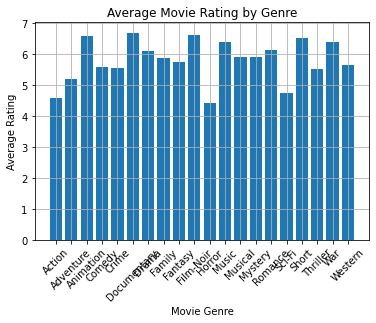

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

#=============================================================================
# calculates and charts the mean rank per genre
#=============================================================================
def chart_mean_rank_genre(df):

  # group by genre/mean rank  
  mean_genre_rank = df.groupby("genre")['rank'].mean()
  labels = mean_genre_rank.keys()

  #=========================================================================
  # produce bar chart
  #=========================================================================
  plt.bar(labels, mean_genre_rank)
  plt.xticks(rotation=45)
  plt.xlabel('Movie Genre')
  plt.ylabel('Average Rating')
  plt.title('Average Movie Rating by Genre')
  plt.grid()
  plt.show()

# program starts here
url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"

movie_df = pd.read_csv(url)

df = clean_data(movie_df)

chart_mean_rank_genre(df)

### Plot a pie chart of how many movies of each genre there are 
---


'Sorted Duplicate Values: '

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55954 entries, 274883 to 151291
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  55954 non-null  object 
 1   last_name   55954 non-null  object 
 2   name        55954 non-null  object 
 3   year        55954 non-null  int64  
 4   rank        55954 non-null  float64
 5   genre       55954 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ MB


'Info: '

None

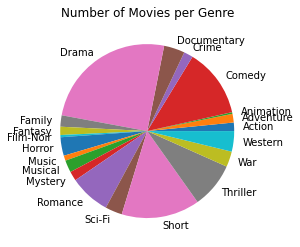

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

#============================================================================
# Produces a pie chart of the number of movies per genre 
#============================================================================
def chart_mean_rank_genre(df):

  #=========================================================================
  # group by genre and count movies in each
  #=========================================================================
  movies_by_genre_cnt = df.groupby("genre")['name'].count()
  labels = movies_by_genre_cnt.keys()

  #=========================================================================
  # produce pie chart
  #=========================================================================
  plt.pie(movies_by_genre_cnt, labels=labels)
  plt.xticks(rotation=45)
  plt.title('Number of Movies per Genre')
  #plt.ylabel('Average Rating')
  plt.grid()
  # changing the size of figure to 2X2
  plt.show()

# program starts here
url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"

movie_df = pd.read_csv(url)

df = clean_data(movie_df)

chart_mean_rank_genre(df)

### Plot a graph showing the mean Rank for each year 

'Sorted Duplicate Values: '

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55954 entries, 274883 to 151291
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  55954 non-null  object 
 1   last_name   55954 non-null  object 
 2   name        55954 non-null  object 
 3   year        55954 non-null  int64  
 4   rank        55954 non-null  float64
 5   genre       55954 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ MB


'Info: '

None

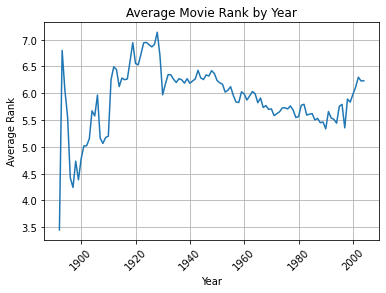

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

#============================================================================
# Produces a chart of the average film rank per year
#============================================================================
def chart_mean_rank_year(df):

  #============================================================================
  # group by year and calculate the mean rank
  #============================================================================
  mean_rank = df.groupby("year")['rank'].mean()
  labels = mean_rank.keys()
  
  plt.plot(labels, mean_rank)
  plt.xticks(rotation=45)
  plt.xlabel('Year')
  plt.ylabel('Average Rank')
  plt.title('Average Movie Rank by Year')
  plt.grid()
  plt.show()

# program starts here
url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"

movie_df = pd.read_csv(url)

df = clean_data(movie_df)

chart_mean_rank_year(df)

### What else can you find out from this dataset?
---
Make a plan of 3 further things you can do to interrogate and analyse this dataset

Type your answer here  

1.  The lowest rank per year
2.  The number of films released per year
3.   The number of producers per genre

### Complete the tasks you have set out in the exercise above. 
---


'Sorted Duplicate Values: '

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55954 entries, 274883 to 151291
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   first_name  55954 non-null  object 
 1   last_name   55954 non-null  object 
 2   name        55954 non-null  object 
 3   year        55954 non-null  int64  
 4   rank        55954 non-null  float64
 5   genre       55954 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ MB


'Info: '

None

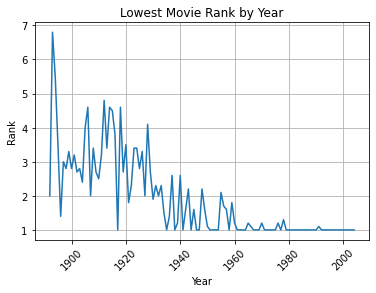

'movies by year count: '

,first_name,last_name,name,rank,genre
year,,,,,
1892,4,4,4,4,4
1893,1,1,1,1,1
1894,3,3,3,3,3
1895,26,26,26,26,26
1896,13,13,13,13,13
...,...,...,...,...,...
2000,2216,2216,2216,2216,2216
2001,2177,2177,2177,2177,2177
2002,2255,2255,2255,2255,2255


'labels: '

Int64Index([1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
            ...
            1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004],
           dtype='int64', name='year', length=113)

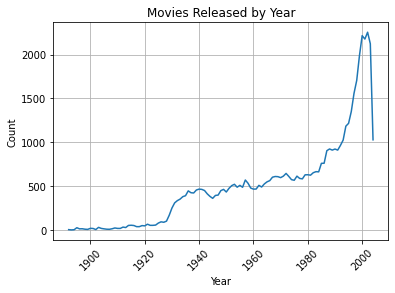

producer_by_genre_cnt:  genre
Action          574
Adventure       587
Animation       141
Comedy         3398
Crime           749
Documentary    1541
Drama          5941
Family          833
Fantasy         677
Film-Noir       130
Horror         1252
Music           428
Musical         750
Mystery         646
Romance        2442
Sci-Fi         1133
Short          3284
Thriller       2674
War            1045
Western         752
Name: last_name, dtype: int64


'labels: '

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Horror', 'Music', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Short', 'Thriller', 'War', 'Western'],
      dtype='object', name='genre')

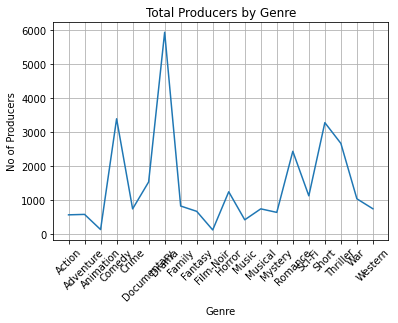

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

#============================================================================
# Produces a chart of the lowest film rank per year
#============================================================================
def chart_min_rank_year(df):
  
  #============================================================================
  # group by year and find the lowest rank for that year  
  #============================================================================
  min_rank = df.groupby("year")['rank'].min()
  labels = min_rank.keys()
  #============================================================================
  # Plot the chart
  #============================================================================
  plt.plot(labels, min_rank)
  plt.xticks(rotation=45)
  plt.xlabel('Year')
  plt.ylabel('Rank')
  plt.title('Lowest Movie Rank by Year')
  plt.grid()
  plt.show()

  return
#============================================================================
# Produces a chart of the number of films released per year
#============================================================================
def chart_movie_release_by_year(df):
  # group by genre/mean rank  
  movies_by_year_cnt = df.groupby("year").count()
  display("movies by year count: ", movies_by_year_cnt)
  movie_cnt = movies_by_year_cnt['name']
  labels = movie_cnt.keys()
  display("labels: ", labels)

  plt.plot(labels, movie_cnt)
  plt.xticks(rotation=45)
  plt.xlabel('Year')
  plt.ylabel('Count')
  plt.title('Movies Released by Year')
  plt.grid()
  plt.show()

  return

def chart_count_producer_by_genre(df):
  # group by genre and count unique producers

  #grouped = df.groupby("genre").count()
  #print (grouped["genre"])

  #=================================================================
  # Count the number of unique producers by genre
  #=================================================================
  producer_by_genre_cnt = df.groupby('genre')['last_name'].nunique()
 
  print("producer_by_genre_cnt: ", producer_by_genre_cnt)
  
  labels = producer_by_genre_cnt.keys()

  display("labels: ", labels)

  plt.plot(labels, producer_by_genre_cnt)
  #plt.plot(labels, genre_cnt)
  plt.xticks(rotation=45)
  plt.xlabel('Genre')
  plt.ylabel('No of Producers')
  plt.title('Total Producers by Genre')
  plt.grid()

  return

#============================================================================
# ** not completed yet **
# Produces a chart of the number of films released by each producer
#============================================================================
#def find_producers_total_movies(df):
  # group by genre/mean rank  
  #movies_by_producer_cnt = df.groupby("last_name")['name'].count()
  #display("movies by producer count: ", movies_by_producer_cnt)

  # firstly, sort the data on movie, director and year
  #df = df.sort_values(by = ["name", "last_name", "first_name", "year"])
  #labels = movies_by_producer_cnt.keys()
  #display("labels: ", labels)

  #plt.plot(labels, movies_by_producer_cnt)
  #plt.xticks(rotation=45)
  #plt.xlabel('Producer')
  #plt.ylabel('No. of Movies')
  #plt.title('No Movies Released by Producer')
  #plt.grid()
  #plt.show()

  #return
#===========================================================================
# program starts here
#===========================================================================
url = "https://github.com/lilaceri/Working-with-data-/blob/main/Data%20Sets%20for%20code%20divisio/movies.csv?raw=true"

movie_df = pd.read_csv(url)

df = clean_data(movie_df)

#===========================================================================
# Find and chart the lowest movie rank by year
#===========================================================================
chart_min_rank_year(df)

#===========================================================================
# Find and chart the no. of movies released by year
#===========================================================================
chart_movie_release_by_year(df)

#===========================================================================
# Find and chart the number of producers per genre
#===========================================================================
chart_count_producer_by_genre(df)

#============================================================================
# Produces a chart of the number of films released by each producer
#============================================================================
#find_producers_total_movies(df)


# Reflection
----

## What skills have you demonstrated in completing this notebook?

* Code reuse
* writing function to process data from an external source
*writing function to clean data
*writing function to inspect the data and extracting basic info about it such as identifying the shape, structure, datatypes, missing data, duplicate data as well as summary statistics
* using the `groupby` method to organise the data in specific ways to extract particular information and statistics
*charting the extracted information in different ways to visually display relationships

* analysing the problems posed by the challenge and identifying the best ways to solve them. 
* Planning, writing and then testing and revising the code to put my solutions into effect

## What caused you the most difficulty?

For the most part this was a fairly straight-forward project. However, I was using the `groupby` operation several times within my code to group the data in various ways to extract the data that I subsequently used to produce charts and  I did have some difficulty with the
`groupby`syntax. When I revisited the code it suddenly occurred to me that I could simplify and thus improve my code by doing in a single step what I had previously been doing in two.

For instance - when working out the mean `rank` for each `genre`, my original code was calculating the mean for the entire dataframe and then as a separate step, extracting the mean for the `rank` column *ie:*
```
# group by genre/mean rank  
  mean_genre_rank = df.groupby("genre").mean()
  rank = mean_genre_rank['rank']

```
My revised code does the same thing, but in a single step *ie:*
```
# group by genre/mean rank  
  mean_genre_rank = df.groupby("genre")['rank'].mean()
```


